# Virtual Screening Case Study 2
## Bioinformatics approaches in adhesion GPCR research


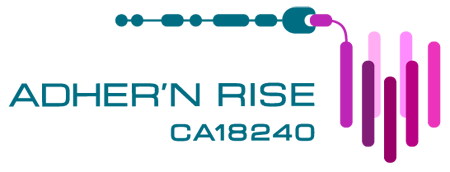


# Introduction
In this tutorial we will learn how to run the virtual screening using the open source software.
<br> Before beginning, be sure that all requirements are met (see README file) and jupyter notebook is run under the "oddt" kernel.

The Case Study is oriented towards emerging field of discovery of small molecule activators of aGPCRs.

We will learn how to exploit molecular docking in order to reduce the costs of <i> in vitro </i> screening campaigns, to find the lead structures and generate hypotheses for lead optimizations. 

## Theoretical background for the case study
1. <i> In vitro </i> screening study for discovery of Small-Molecule Partial Agonists for Adhesion G-Protein-Coupled Receptors GPR56/ADGRG1 and GPR114/ADGRG5 <br> https://molpharm.aspetjournals.org/content/93/5/477

2. Structure of GPR97–Go complex  <br> https://www.nature.com/articles/s41586-020-03083-w
3. The tethered peptide activation mechanism of adhesion GPCRs (GPR56 structure)  <br> https://www.nature.com/articles/s41586-022-04575-7

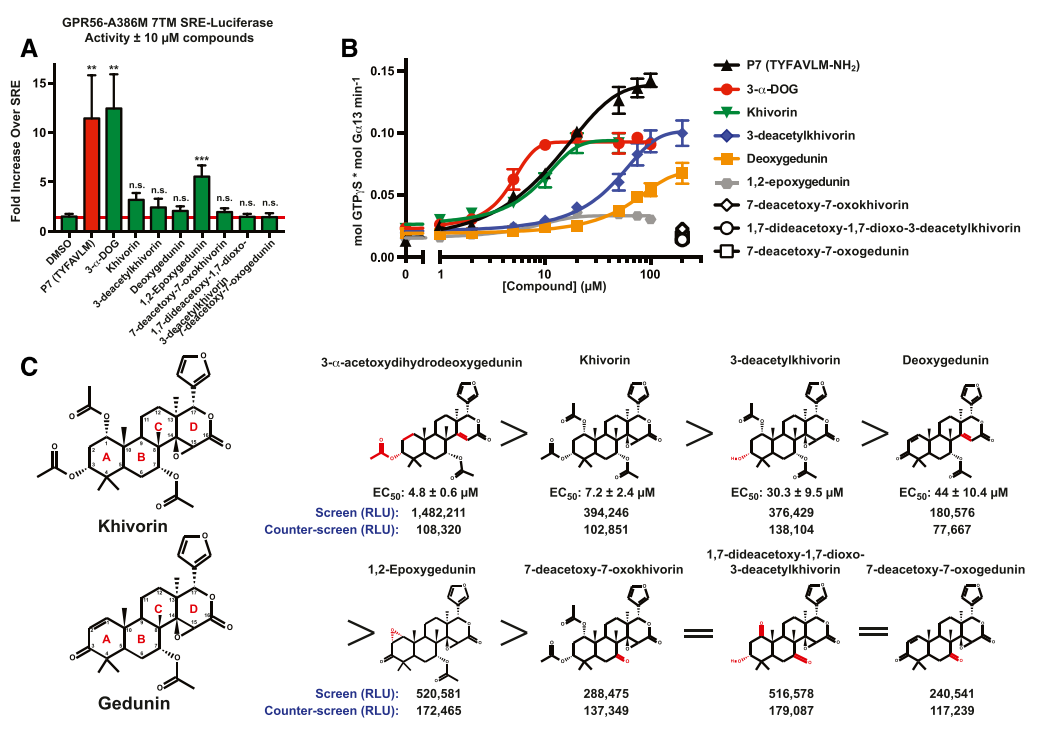

# Task: Perform the screening of the database and compare where abovementioned derivatives are positioned?
<i> Due to the time limitation, virtual screening of all compounds except abovementioned is performed and results are summarized in the /Results/Table1.csv file. Participants should only perform screening of the abovementioned molecules (khivorin and gedunin derivatives). <i/>

In [2]:
#Before we begin, make sure you have saved AMDock and gypsum at some easy-to-find locations (Win users).
#macOS users should download and extract Vina binary from https://vina.scripps.edu/downloads/

- ## Step 1 - Protein preparation
Repeat all the steps from previous lesson. 
1. Fetch the protein structure: PDB ID 7SF8 (PyMOL)
2. Remove all of the unnecessary chains (PyMOL)
3. Extract the tethered agonist peptide as separate object (TYFAVLM) (PyMOL)
4. Save and protonate apo protein (https://server.poissonboltzmann.org/pdb2pqr)
5. Download output pqr file, and discuss the definition of the binding site. Convert it back to pdb.


- ## Step 2 - Ligands preparation
1. Prepare the ligands in SMILES format with tab-separated IDs
2. Run the gypsum script with desirable options summarized in sample_molecules.json file (manual https://durrantlab.pitt.edu/gypsum-dl/)
<br> 
<br><i>  Note: Due to the time limitations, this is already performed and resulting gypsum_dl_success.sdf file is in folder gypsum_dl_test_output_screening/ <i/> <br>
<br> 
3. Inspect the output SDF file
4. Extract the abovementioned ligands



In [62]:
#!python C:/Users/Korisnik/Documents/trening_skola/gypsum_dl-1.2.0/gypsum_dl-1.2.0/run_gypsum_dl.py -j ./sample_molecules.json
!python C:/Users/Korisnik/Documents/trening_skola/gypsum_dl-1.2.0/gypsum_dl-1.2.0/run_gypsum_dl.py -j ./sample_molecules_gedunin_khivorin.json


If you use Gypsum-DL in your research, please cite:

Ropp, Patrick J., Jacob O. Spiegel, Jennifer L. Walker, Harrison Green,
Guillermo A. Morales, Katherine A. Milliken, John J. Ringe, and Jacob D. Durrant.
(2019) Gypsum-DL: An Open-source Program for Preparing Small-molecule Libraries for 
Structure-based Virtual Screening. Journal of Cheminformatics 11:1. 
doi:10.1186/s13321-019-0358-3.

    Serial mode.
    Gypsum-DL-generated variants, we have identified a number of substructures
    that, though technically possible, strike us as improbable or otherwise
    poorly suited for virtual screening. We strongly recommend removing these by
    running Gypsum-DL with the --use_durrant_lab_filters option.

Loading molecules from gedunin_khivorin_derivatives2.smi...
Desalting all molecules (i.e., keeping only largest fragment).
    Contents of MolContainers
        MolContainer #0 (3alpha-ACETOXYDIHYDRODEOXYGEDUNIN)
            Mol #0: CC(=O)O[C@@H]1CC[C@@]2(C)C(C[C@@H](OC(C)=O)[C@@]3(C)C4

- ## Step 3 - Virtual Screening
<i> Below is the code for automatization of docking. Since we will be working with few compounds you may also skip all steps and use AMDock to practice 1 by 1 docking. <i/>

1. Import ODDT and dependent libraries (https://doi.org/10.1186/s13321-015-0078-2) in Jupyter notebook (package documentation https://oddt.readthedocs.io/en/latest/index.html)
2. Create the instance of autodock_vina class in ODDT. 
3. Adapt all of the paths to the input files. All input files for docking are automatically generated in AMDock Project directory (see 1.)
4. Run the virtual screening and write output SDF file


In [5]:
import oddt
from rdkit import Chem
from rdkit.Chem import AllChem
from oddt.docking import autodock_vina

In [6]:
#Initiate VS (ODDT documentation https://oddt.readthedocs.io/en/latest/index.html)
#In absence of cocrystal ligand, we will use coordinates for box centering
#Be carefull with exaustiviness. Default is around 8. We lower this to speed up the screening.
# Locate binary at AMDock-win-master/Lib/site-packages/AMDock/programs/vina
vina_path = '../AMDock-win-master/AMDock-win-master/Lib/site-packages/AMDock/programs/vina'
vs = autodock_vina(protein='./Input_files/7sf8_TM_H_cut.pdb',
                   center=(148.177,173.914,176.616),
                   #auto_ligand='C:/Users/Korisnik/Documents/trening_skola/Virtual Screening Tutorial aGPCR/gypsum_dl_test_output_pimozide/gypsum_dl_success.sdf',
                   executable=vina_path,
                   exhaustiveness=8,
                   n_cpu=4,
                   size=(22, 22, 22),
                   num_modes=9,
                   prefix_dir = '.'
                  )

In [7]:
# Just to check the centering of the docking box

vs.center

(148.177, 173.914, 176.616)

In [8]:
# Perform actuall screening within the "for" loop and write output of EACH docking run (coordinates, scores, IDs etc.) in list object.

# Counter is set because first compound in genereated SDF is empty by default so we have to skip it.
# Alternative is to manually delete first compound from SDF using the text editor, or some software for sdf manipulation
# (Discovery Studio, Instant JChem from ChemAxon etc.). In that case, delete the counter (if/else)

Dock_results = []
i = 0
for mol in oddt.toolkit.readfile( 'sdf', './Input_files/gypsum_dl_success_khivorin_derivatives.sdf'):
            if i > 0:
                dock_res = vs.dock(mol)
                Dock_results.append(dock_res)
            else:
                i = i+1
                

KeyboardInterrupt: 

In [67]:
#Separate output molecules from same docking runs

All_Result = []

for poses in Dock_results:
     for pose in poses:
        All_Result.append(pose)

len (All_Result)
 # 449

27

In [68]:
#Write the output ussing Outputfile ODDT class (documentation https://oddt.readthedocs.io/en/latest/index.html)
DockAllResultOutput = oddt.toolkit.Outputfile( 'sdf' , 'ODDT_Dock_All_Result_gedunin_khivorin3.sdf', overwrite=True)
for mol in All_Result:
    DockAllResultOutput.write(mol)
DockAllResultOutput.close()

- ## Step 4 - Analysis of Results
1. Compare the rank of known active molecules with literature data (see figure above)
2. Visualize in 2D and 3D.
3. Discuss how would you modify the analogues of hit compounds (in silico)
4. Discuss alternatives to the SMILES format

In [9]:
import py3Dmol
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
import MDAnalysis as mda
from MDAnalysis.coordinates import PDB
import openbabel
import prolif as plf
from prolif.plotting.network import LigNetwork

In [15]:

def visualize_3d(protein_loc, solitions_loc, id_of_solution, referent_ligsdf_loc):    
    view = py3Dmol.view()
    view.removeAllModels()
    view.setViewStyle({'style':'outline','color':'black','width':0.1})
    #Replace location of protein with yours
    view.addModel(open(protein_loc,'r').read(),format='pdb')
    Prot=view.getModel()
    Prot.setStyle({'cartoon':{'arrows':True, 'cartoon':True, 'lines':True, 'style':'oval', 'color':'white', 'opacity':1}})
    view.addSurface(py3Dmol.VDW,{'opacity':0.5,'color':'white'})
    #Here you add location of docking results and in [] define the number of solution to visualize
    results=Chem.SDMolSupplier(solitions_loc, sanitize=False)
    p=Chem.MolToMolBlock(results[id_of_solution],False)
    view.addModel(p)
    ref_m = view.getModel()
    ref_m.setStyle({},{'stick':{'colorscheme':'greenCarbon','radius':0.2}})
    # ADD referent molecule
    #ref_pdb = Chem.SDMolSupplier(referent_ligsdf_loc, sanitize=False)
    #p_ref = Chem.MolToMolBlock(ref_pdb[0],False)
    view.addModel(open(referent_ligsdf_loc,'r').read(),format='pdb')
    #view.addModel(p_ref)
    ref_mm = view.getModel()
    ref_mm.setStyle({},{'stick':{'colorscheme':'blackCarbon','radius':0.1}})

    view.zoomTo()
    view.show()

In [16]:
protein_loc = './Input_files/7sf8_TM_H_cut.pdb'
solitions_loc = './Final_results/ODDT_Dock_All_Result_gedunin_khivorin3.sdf'
id_of_solution = 2
referent_ligsdf_loc = './Input_files/referent_ligand.sdf'
visualize_3d(protein_loc, solitions_loc, id_of_solution, referent_ligsdf_loc)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### Task 1. Analyze the obtained poses of literature compound and our compound

In [22]:
#This is the set of functions which is intented for creation 2d protein-ligand representations
#This function correct formatting of RDKit (known issue of not writting explicit charges in sdf format, which prolif requires)
def add_formal_charges(m):
    m.UpdatePropertyCache(strict=False)
    for at in m.GetAtoms():
        if at.GetAtomicNum() == 7 and at.GetExplicitValence()==4 and at.GetFormalCharge()==0:
            at.SetFormalCharge(1)
    #add_formal_charges(m)
    return Chem.rdmolfiles.MolToMolFile(m, 'ligand.sdf')
#Secon function introduce corrections in mol2 format proposed in prolif documentation
def protein_for_fp(location):
    obConversion = openbabel.OBConversion()
    obConversion.SetInAndOutFormats("pdb", "mol2")
    mol = openbabel.OBMol()
    obConversion.ReadFile(mol, location)   # Open Babel will uncompress automatically
    obConversion.WriteFile(mol, 'protein_pdb.mol2')
    u = mda.Universe("protein_pdb.mol2")
    # add "elements" category
    elements = mda.topology.guessers.guess_types(u.atoms.names)
    u.add_TopologyAttr("elements", elements)
    # replace aromatic bonds with single bonds
    for i, bond_order in enumerate(u._topology.bonds.order):
        # you may need to replace double bonds ("2") as well
        if bond_order == "ar":
            u._topology.bonds.order[i] = 1
    # clear the bond cache, just in case
    u._topology.bonds._cache.pop("bd", None)
    # infer bond orders again
    return plf.Molecule.from_mda(u)
#this funct actually creates dataframe for visualization
def vis_2d(ligand, protein_location):
        prot = protein_for_fp(protein_location)
        ligand = add_formal_charges(ligand)
        lig_suppl_sdf = plf.sdf_supplier('ligand.sdf')
        fp = plf.Fingerprint()
        fp.run_from_iterable(lig_suppl_sdf, prot)
        df = fp.to_dataframe(return_atoms = True)
        return df, lig_suppl_sdf

In [36]:
#Vis2d function accepts as input ligand (results[number] and protein)
#3alpha-DOG

number_of_sol_in_sdf = 0
protein = './Input_files/7sf8_TM_H_cut.pdb'
solitions_loc = './Final_results/ODDT_Dock_All_Result_gedunin_khivorin3.sdf'
#solutions_loc = 'cocrystal.sdf'
results=Chem.SDMolSupplier(solitions_loc, sanitize=False)

df, lig_suppl_sdf = vis_2d(results[number_of_sol_in_sdf],protein)
net = LigNetwork.from_ifp(df,lig_suppl_sdf[0],kind="frame",frame = 0, rotation=20)
net.display()

C:\Users\Korisnik\anaconda3\envs\oddt\lib\openbabel\__init__.py:14: UserWarning: "import openbabel" is deprecated, instead use "from openbabel import openbabel"
  warnings.warn('"import openbabel" is deprecated, instead use "from openbabel import openbabel"')


  0%|          | 0/1 [00:00<?, ?it/s]

In [38]:
#Vis2d function accepts as input ligand (results[number] and protein)
#KHIVORIN

number_of_sol_in_sdf = 9
protein = './Input_files/7sf8_TM_H_cut.pdb'
solitions_loc = './Final_results/ODDT_Dock_All_Result_gedunin_khivorin3.sdf'
#solutions_loc = 'cocrystal.sdf'
results=Chem.SDMolSupplier(solitions_loc, sanitize=False)

df, lig_suppl_sdf = vis_2d(results[number_of_sol_in_sdf],protein)
net = LigNetwork.from_ifp(df,lig_suppl_sdf[0],kind="frame",frame = 0, rotation=20)
net.display()

C:\Users\Korisnik\anaconda3\envs\oddt\lib\openbabel\__init__.py:14: UserWarning: "import openbabel" is deprecated, instead use "from openbabel import openbabel"
  warnings.warn('"import openbabel" is deprecated, instead use "from openbabel import openbabel"')


  0%|          | 0/1 [00:00<?, ?it/s]